In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import os
import ast
from helpers import *

In [20]:
df_std = pd.read_csv("data_cleaned_standardized.csv", index_col=0)

In [21]:
df_std.columns = df_std.columns.str.replace(' ', '')
df_std.columns = df_std.columns.str.replace('-', '')
df_std.columns = df_std.columns.str.replace('&', '')


df_std= df_std[df_std['Movie_box_office_scaled'].notna()]
df_std= df_std[df_std['Movie_runtime'].notna()]
df_std= df_std[df_std['Actor_height_scaled'].notna()]
df_std.columns

Index(['Movie_release_date', 'Movie_box_office_scaled', 'Movie_runtime',
       'Actor_gender_male', 'Actor_height_scaled',
       'Actor_age_at_movie_release', 'Region_Asia', 'Region_Deadcountry',
       'Region_EastEuropa', 'Region_NorthAmerica', 'Region_Oceania',
       'Region_SouthAmerica', 'Region_WestEuropa', 'Cluster_Name_BWIndie',
       'Cluster_Name_ComedyAction', 'Cluster_Name_ComedyShortfilm',
       'Cluster_Name_CrimeThriller', 'Cluster_Name_Drama',
       'Cluster_Name_DramaBW', 'Cluster_Name_DramaComedy',
       'Cluster_Name_DramaIndie', 'Cluster_Name_DramaRomance',
       'Cluster_Name_DramaThriller', 'Cluster_Name_RomanceComedy',
       'Cluster_Name_ShortfilmWorldcinema', 'Cluster_Name_Thriller'],
      dtype='object')

In [22]:
df_std.reset_index(drop=True, inplace=True)
df_std

,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_age_at_movie_release,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,...,Cluster_Name_CrimeThriller,Cluster_Name_Drama,Cluster_Name_DramaBW,Cluster_Name_DramaComedy,Cluster_Name_DramaIndie,Cluster_Name_DramaRomance,Cluster_Name_DramaThriller,Cluster_Name_RomanceComedy,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller
0,0.662661,-0.422297,-0.144006,0,-0.195663,0.213048,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
1,0.662661,-0.422297,-0.144006,0,1.829383,-0.825484,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
2,0.662661,-0.422297,-0.144006,1,-1.009765,-0.479307,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
3,0.662661,-0.422297,-0.144006,1,-0.747543,-0.410071,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
4,0.662661,-0.422297,-0.144006,0,0.184033,-1.102427,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46364,0.364984,-0.367264,0.130824,1,-0.177494,0.282284,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911
46365,0.364984,-0.367264,0.130824,0,0.361225,-0.410071,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911
46366,0.364984,-0.367264,0.130824,1,-0.291504,0.074577,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911
46367,0.364984,-0.367264,0.130824,1,-1.203582,-0.202365,-0.37943,-0.044978,-0.119255,0.674976,...,-0.281005,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911


In [23]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.logit(formula='Actor_gender_male ~  Movie_release_date + Movie_box_office_scaled +Movie_runtime+Actor_height_scaled \
                +Actor_age_at_movie_release+ C(Region_Asia)+ C(Region_Deadcountry)+C(Region_EastEuropa)+C(Region_NorthAmerica)+C(Region_Oceania)\
                +C(Region_SouthAmerica)+C(Region_WestEuropa)+C(Region_Asia)+C(Region_Deadcountry)\
                +C(Region_EastEuropa)+C(Region_NorthAmerica)+C(Region_Oceania)+ C(Cluster_Name_CrimeThriller)+ C(Cluster_Name_Drama)\
                +C(Region_SouthAmerica)+ C(Region_WestEuropa)+ C(Cluster_Name_BWIndie)+C(Cluster_Name_ComedyAction)+ C(Cluster_Name_ComedyShortfilm)+\
                +C(Cluster_Name_DramaBW)+C(Cluster_Name_DramaComedy)+C(Cluster_Name_DramaIndie)+ C(Cluster_Name_DramaRomance)+C(Cluster_Name_DramaThriller)+C(Cluster_Name_RomanceComedy)\
                +C(Cluster_Name_ShortfilmWorldcinema)+C(Cluster_Name_Thriller)', data=df_std)
res = mod.fit()
df_std['Propensity_score'] = res.predict()
print(res.summary())
df_std.head()

Optimization terminated successfully.
         Current function value: 0.564514
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Actor_gender_male   No. Observations:                46369
Model:                          Logit   Df Residuals:                    46343
Method:                           MLE   Df Model:                           25
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                  0.1226
Time:                        13:48:31   Log-Likelihood:                -26176.
converged:                       True   LL-Null:                       -29833.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept     

,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_age_at_movie_release,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,...,Cluster_Name_Drama,Cluster_Name_DramaBW,Cluster_Name_DramaComedy,Cluster_Name_DramaIndie,Cluster_Name_DramaRomance,Cluster_Name_DramaThriller,Cluster_Name_RomanceComedy,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller,Propensity_score
0,0.662661,-0.422297,-0.144006,0,-0.195663,0.213048,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.820378
1,0.662661,-0.422297,-0.144006,0,1.829383,-0.825484,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.358258
2,0.662661,-0.422297,-0.144006,1,-1.009765,-0.479307,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.836962
3,0.662661,-0.422297,-0.144006,1,-0.747543,-0.410071,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.817167
4,0.662661,-0.422297,-0.144006,0,0.184033,-1.102427,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.596181


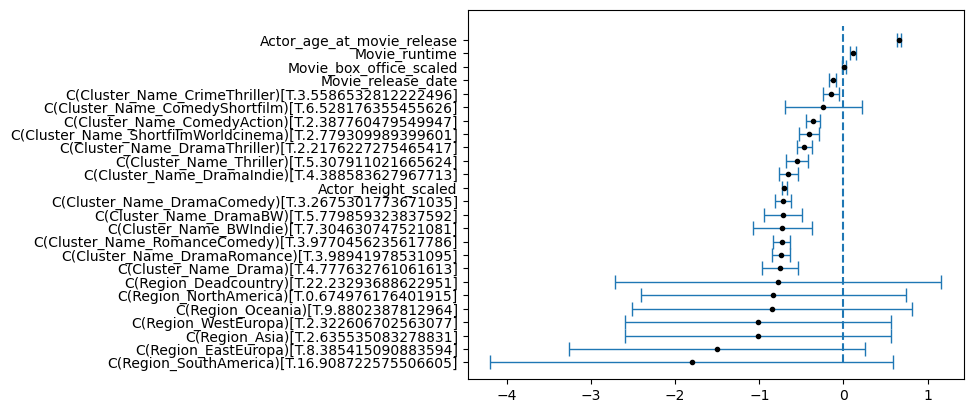

In [24]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))
plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

In [25]:
import networkx as nx
dftest = df_std.sample(n=250)

control = dftest[dftest.Actor_gender_male == 0]
treat =  dftest[dftest.Actor_gender_male == 1 ]
def computediff(prop1,prop2):
    return np.abs(prop1-prop2)
def compute_similarity(prop1,prop2):
    return 1-np.abs(prop1-prop2)

G = nx.Graph()
for treat_id,treat_row in treat.iterrows():
    for control_id, control_row in control.iterrows():
        diff= computediff(control_row["Propensity_score"],treat_row["Propensity_score"])
        if (diff<0.05):
            similarity =  compute_similarity(control_row["Propensity_score"],treat_row["Propensity_score"])
            G.add_weighted_edges_from([(control_id, treat_id, similarity)])
matching = nx.max_weight_matching(G)
#matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
print("Number of successful matching:",len(matching))
print(matching)
dftest.head(50)

Number of successful matching: 76
{(10492, 4081), (11921, 14093), (33847, 25103), (16677, 15716), (25007, 20418), (23316, 11602), (16244, 16182), (43281, 12645), (42316, 33438), (10626, 21312), (16943, 5160), (11038, 19749), (16220, 6785), (24920, 39606), (41987, 32133), (31606, 41312), (2066, 27100), (16973, 20632), (37147, 20595), (89, 27595), (15997, 98), (13177, 32587), (4941, 1020), (40351, 36716), (40115, 18653), (20081, 2625), (5823, 43452), (32841, 27888), (5565, 39246), (29668, 23365), (14875, 41064), (16730, 9872), (10769, 18044), (28195, 29913), (2986, 9478), (774, 43632), (41636, 35935), (34938, 9735), (577, 14205), (42092, 33939), (37882, 36657), (36962, 16985), (41071, 18828), (24569, 28956), (20465, 4858), (28201, 27708), (37894, 13387), (46106, 34376), (25360, 2931), (10871, 1592), (31587, 11384), (29109, 11353), (17847, 6023), (16337, 12015), (8335, 43783), (10651, 10430), (39959, 33207), (32722, 28097), (14712, 16891), (41259, 8664), (15682, 42040), (20555, 27469), (9

,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_age_at_movie_release,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,...,Cluster_Name_Drama,Cluster_Name_DramaBW,Cluster_Name_DramaComedy,Cluster_Name_DramaIndie,Cluster_Name_DramaRomance,Cluster_Name_DramaThriller,Cluster_Name_RomanceComedy,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller,Propensity_score
6837,0.885918,1.421180,0.558338,0,-0.448794,-1.102427,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.681908
37882,-0.900141,-0.440967,1.779806,1,-0.291504,-0.756249,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,5.779859,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.657855
43540,0.476613,-0.201448,-0.082933,1,-1.226384,-0.271600,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911,0.802651
9857,0.327775,-0.154875,0.283508,1,0.734584,0.974639,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911,0.712414
138,-0.193159,-0.292150,0.558338,0,1.449687,-1.033191,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.400269


In [42]:
dftest.head(50)

,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_age_at_movie_release,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,...,Cluster_Name_Drama,Cluster_Name_DramaBW,Cluster_Name_DramaComedy,Cluster_Name_DramaIndie,Cluster_Name_DramaRomance,Cluster_Name_DramaThriller,Cluster_Name_RomanceComedy,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller,Propensity_score
6837,0.885918,1.421180,0.558338,0,-0.448794,-1.102427,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.681908
37882,-0.900141,-0.440967,1.779806,1,-0.291504,-0.756249,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,5.779859,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.657855
43540,0.476613,-0.201448,-0.082933,1,-1.226384,-0.271600,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911,0.802651
9857,0.327775,-0.154875,0.283508,1,0.734584,0.974639,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,5.307911,0.712414
138,-0.193159,-0.292150,0.558338,0,1.449687,-1.033191,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.400269
16891,1.034756,0.790491,-0.144006,1,-0.291504,0.836168,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.831779
14712,0.662661,0.034712,1.474439,0,-1.461316,-0.617778,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,2.217623,-0.251443,-0.359802,-0.188398,0.830791
28956,0.551032,-0.480941,0.283508,1,0.153134,-0.617778,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,3.989420,-0.450933,-0.251443,-0.359802,-0.188398,0.513489
15997,0.811499,-0.265344,-0.357763,1,-0.177494,0.143813,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,4.388584,-0.250663,-0.450933,-0.251443,-0.359802,-0.188398,0.682209
34891,0.699870,-0.469404,-0.449373,1,-1.294789,0.489990,-0.37943,-0.044978,-0.119255,0.674976,...,-0.209309,-0.173015,-0.306042,-0.227864,-0.250663,-0.450933,3.977046,-0.359802,-0.188398,0.845195


In [26]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
bd = df_std.iloc[matched]

treated = bd.loc[bd['Actor_gender_male'] == 1]
control= bd.loc[bd['Actor_gender_male'] == 0]


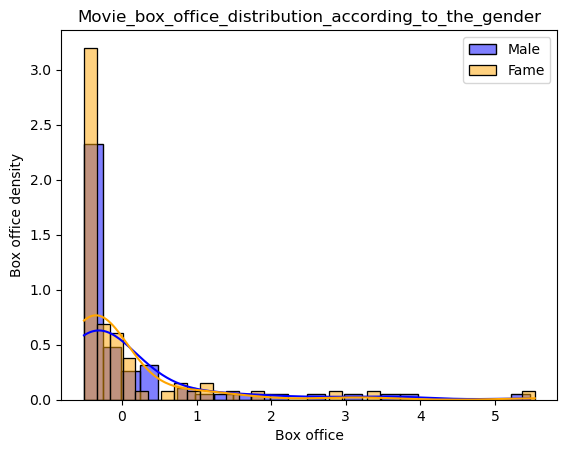

In [27]:
ax = sns.histplot(treated['Movie_box_office_scaled'], kde=True, stat='density', color='blue', label='Male');
ax = sns.histplot(control['Movie_box_office_scaled'], kde=True, stat='density', color='orange', label='Fame')
ax.set(title='Movie_box_office_distribution_according_to_the_gender',xlabel='Box office', ylabel='Box office density')
plt.legend()
plt.show()


In [28]:
from scipy.stats import ttest_ind
ttest_ind(treated['Movie_box_office_scaled'],control['Movie_box_office_scaled'])

TtestResult(statistic=0.9354496525787869, pvalue=0.3510601620166174, df=150.0)